Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')
14


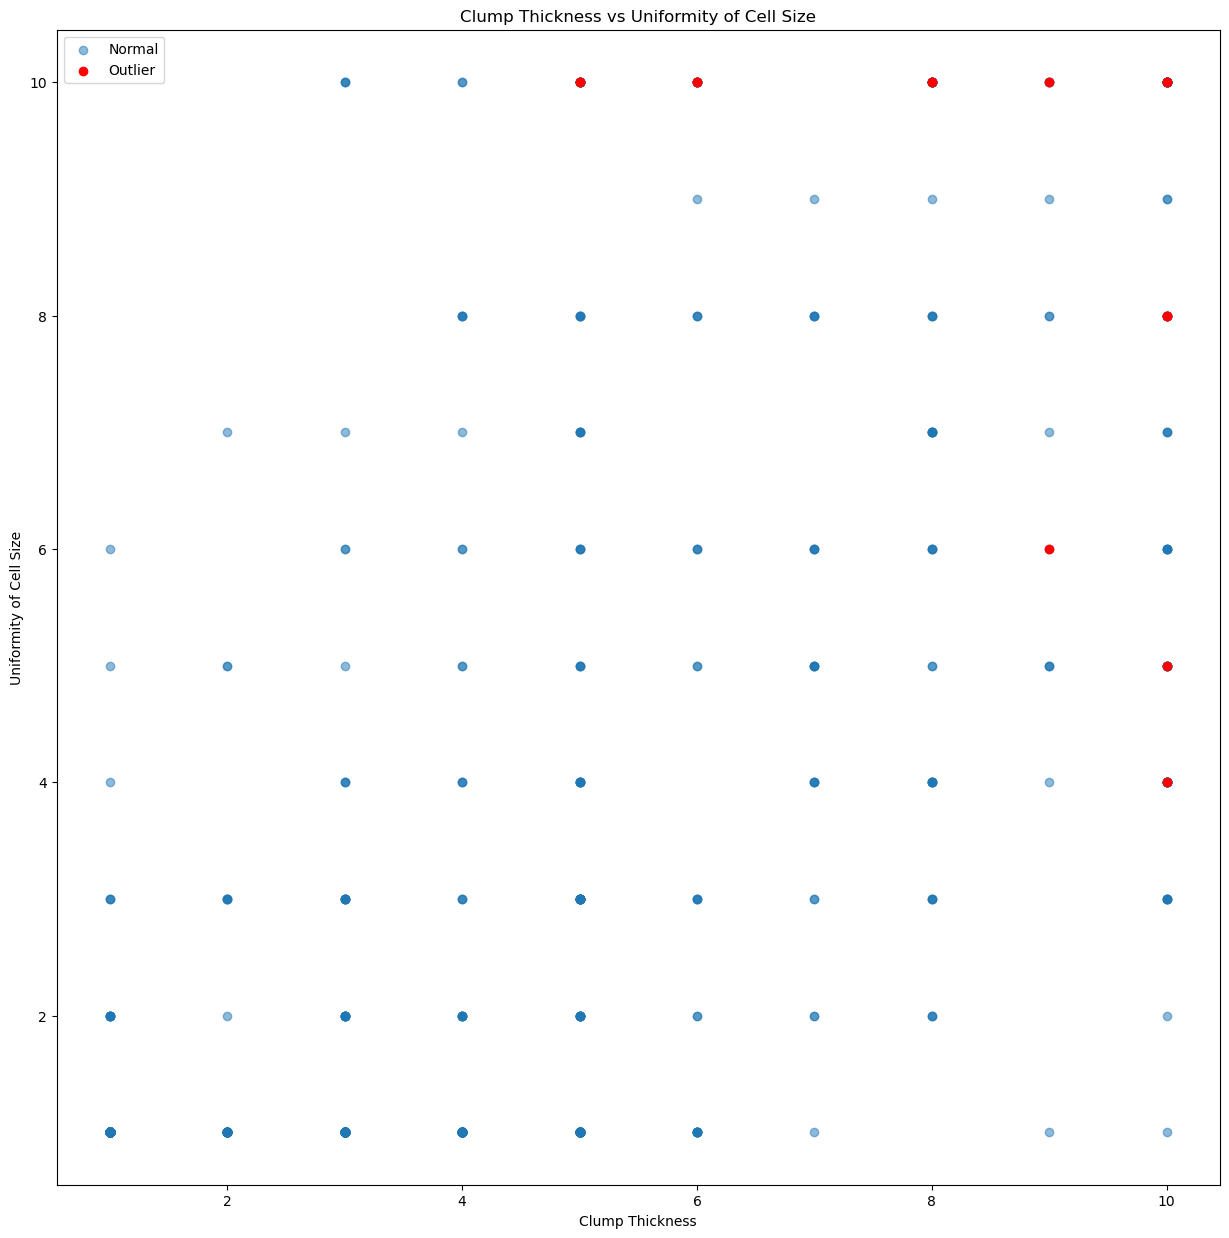

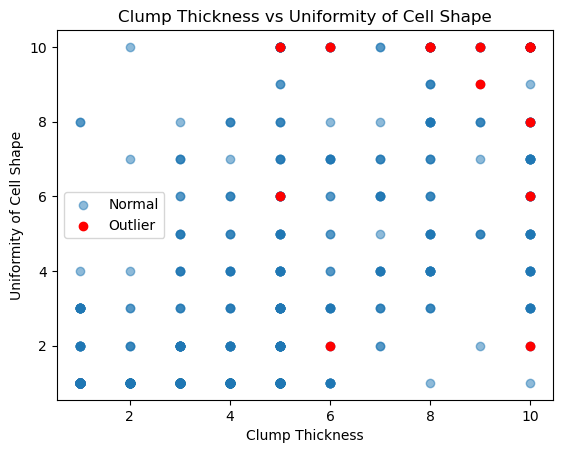

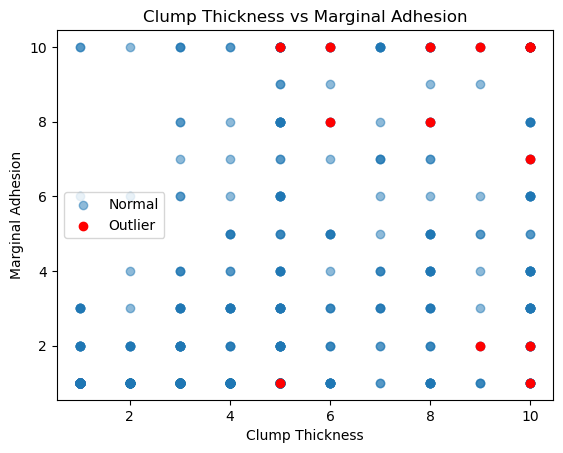

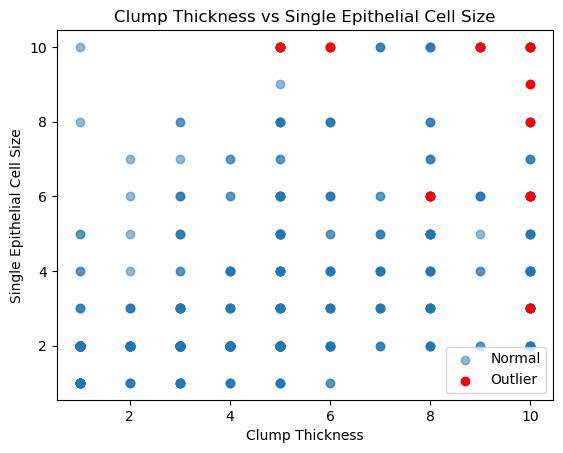

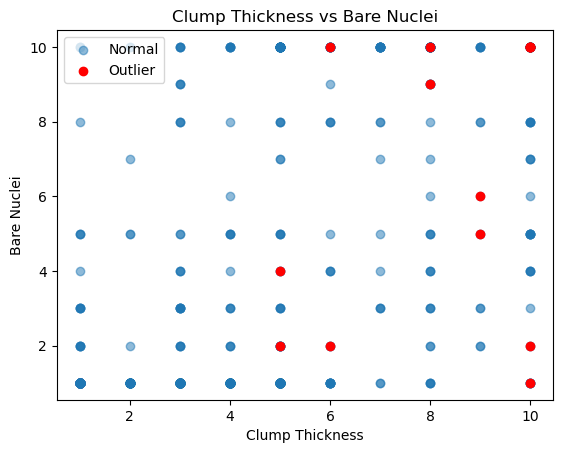

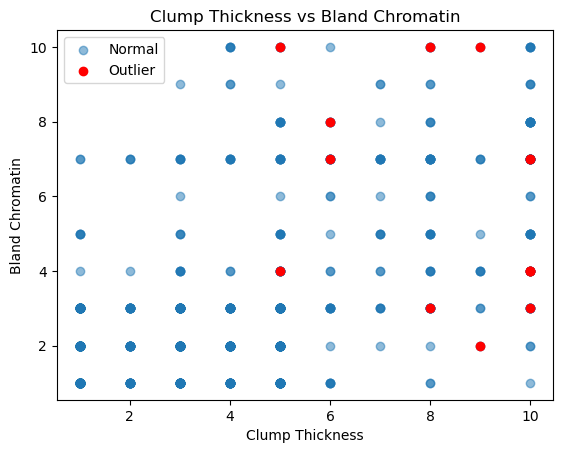

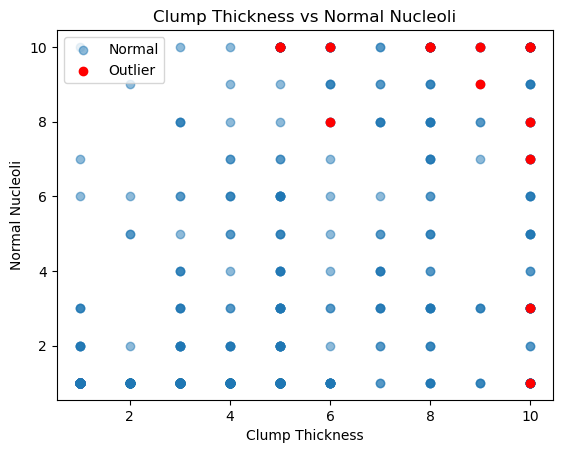

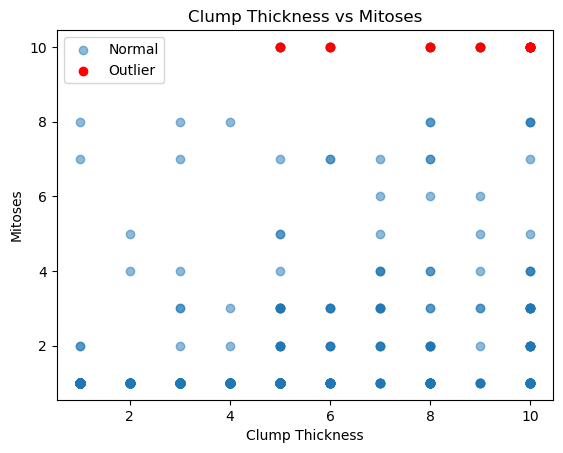

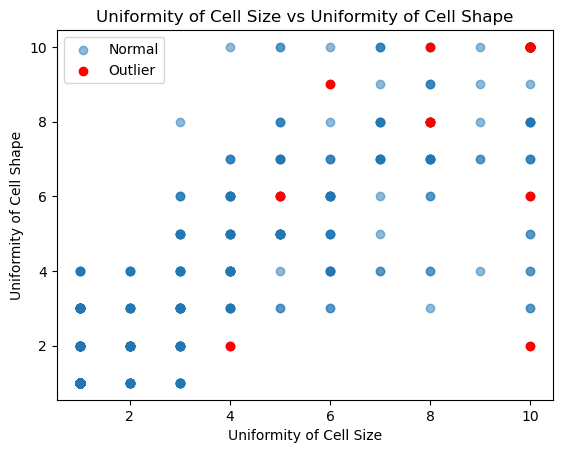

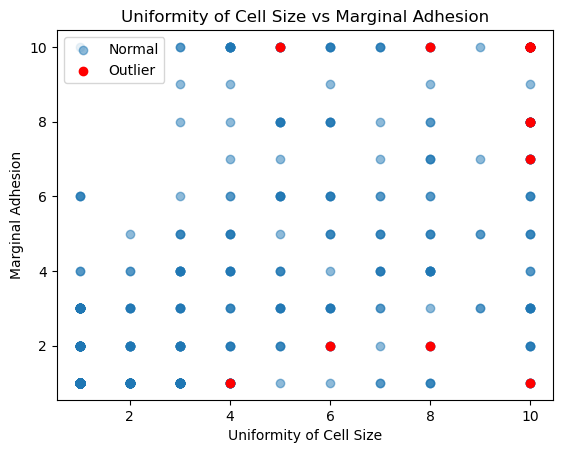

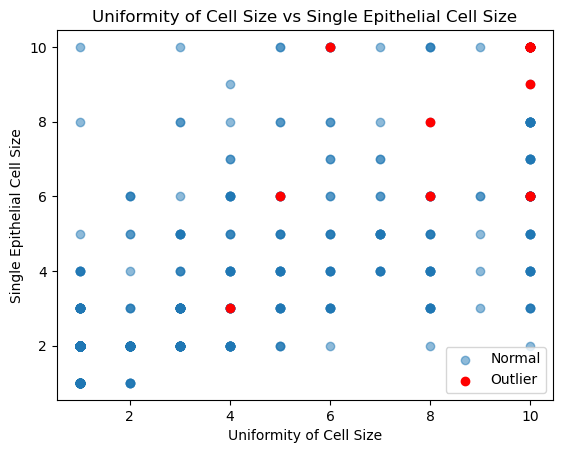

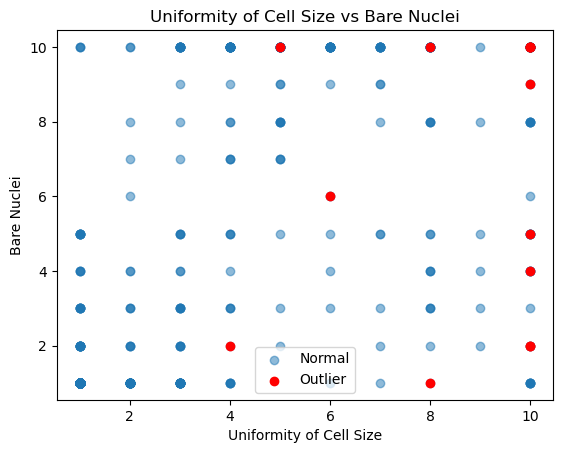

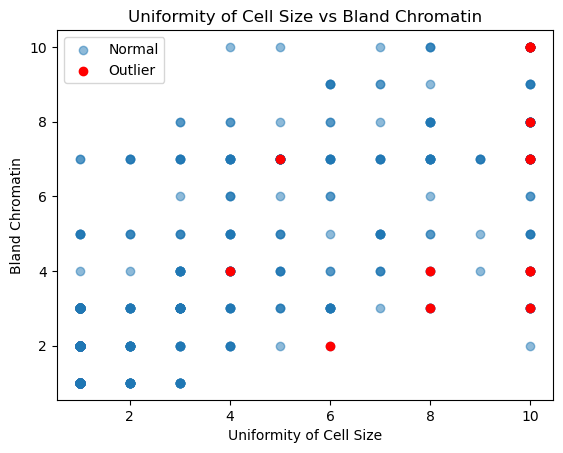

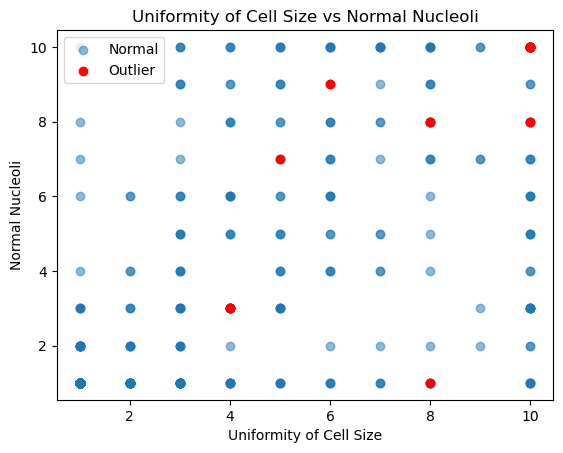

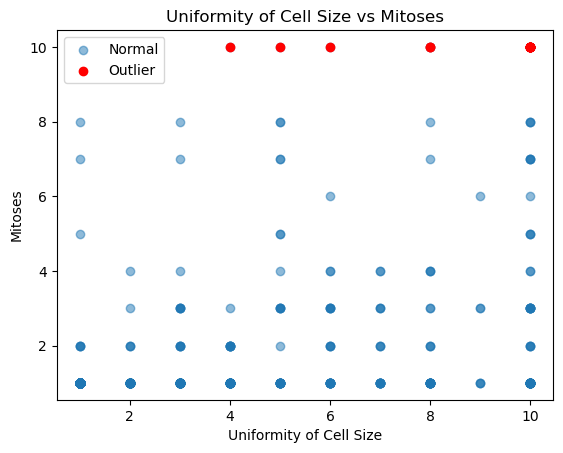

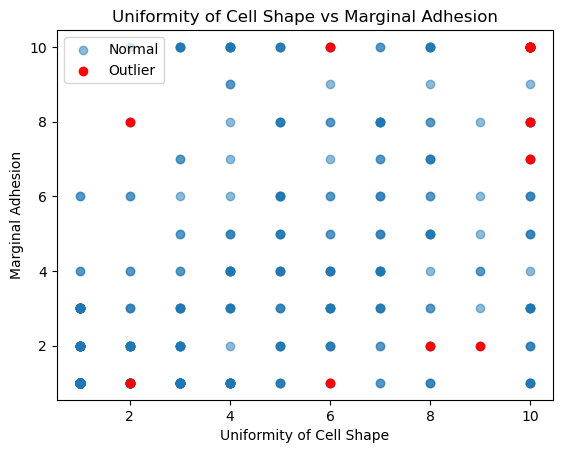

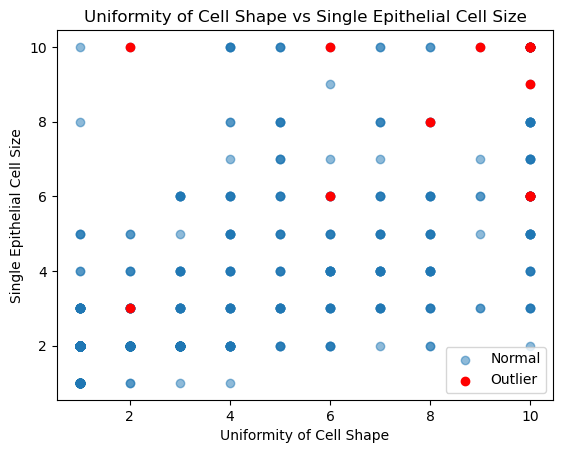

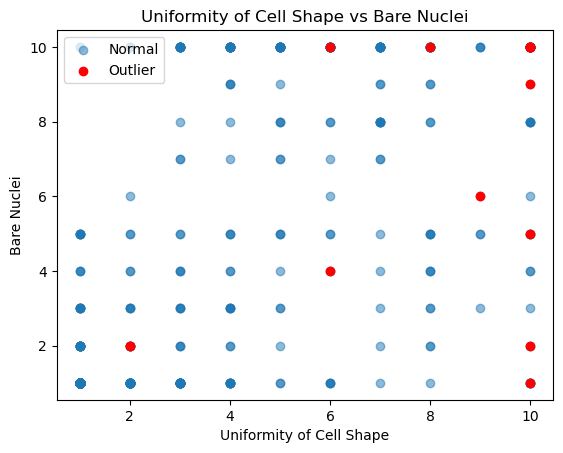

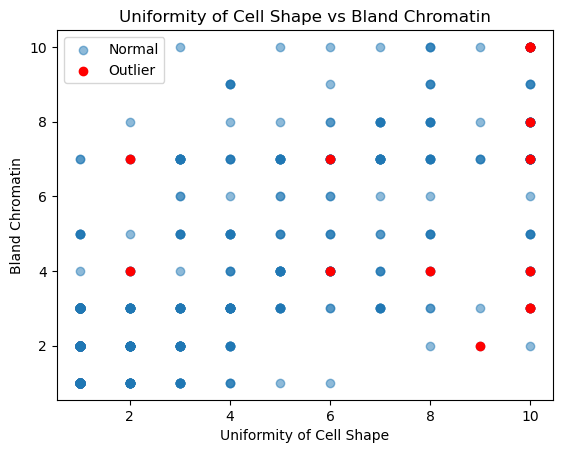

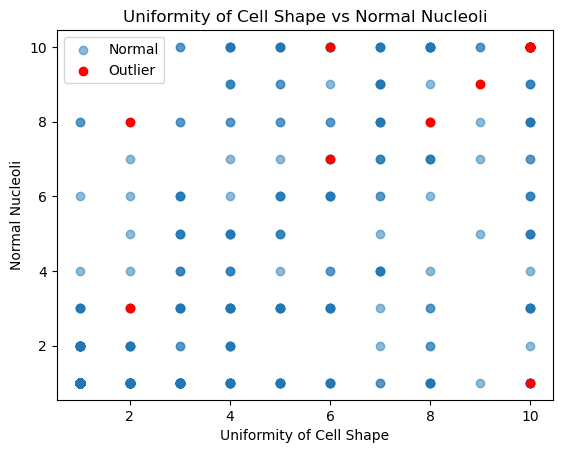

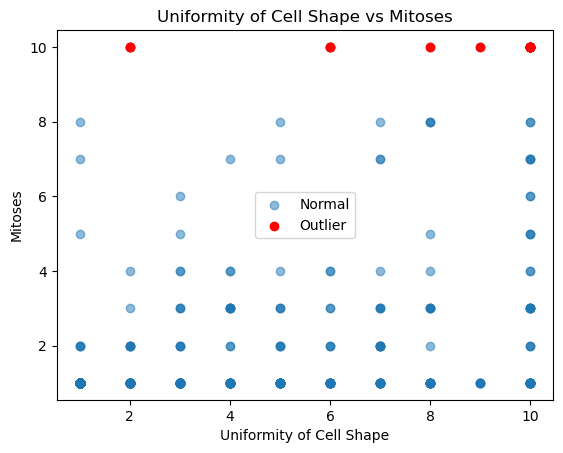

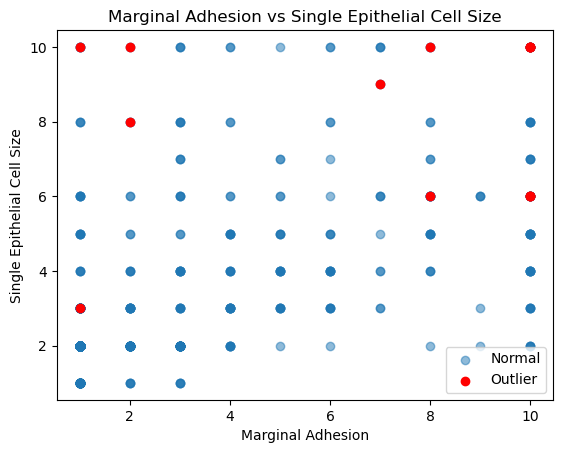

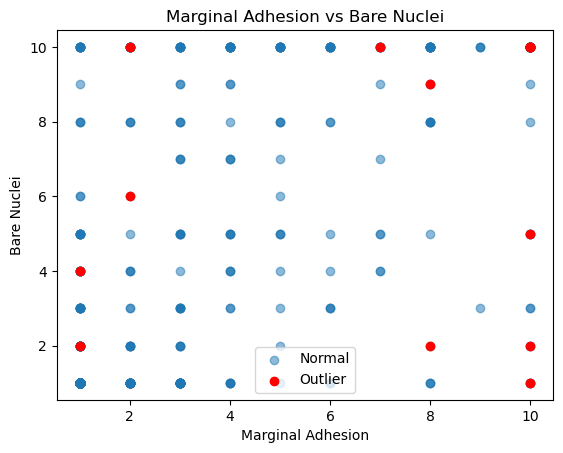

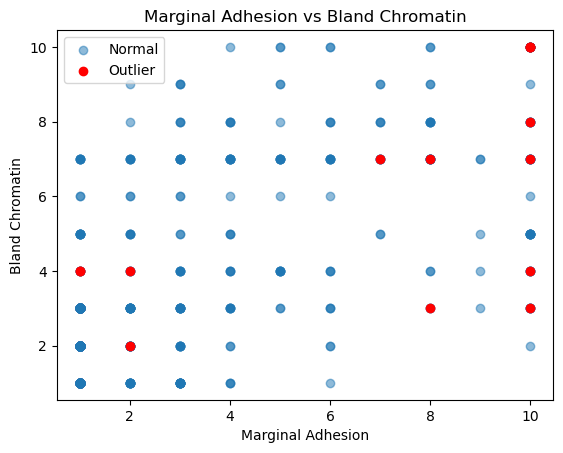

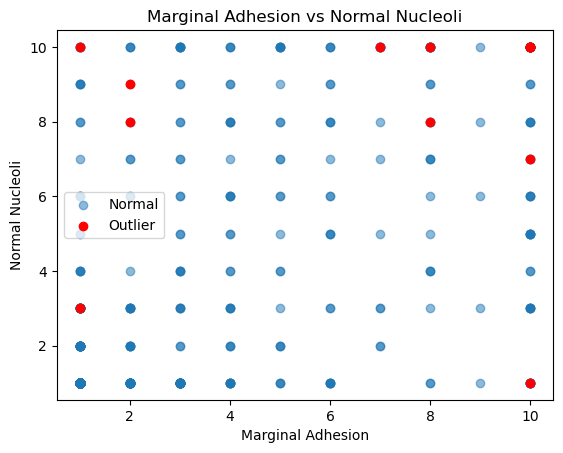

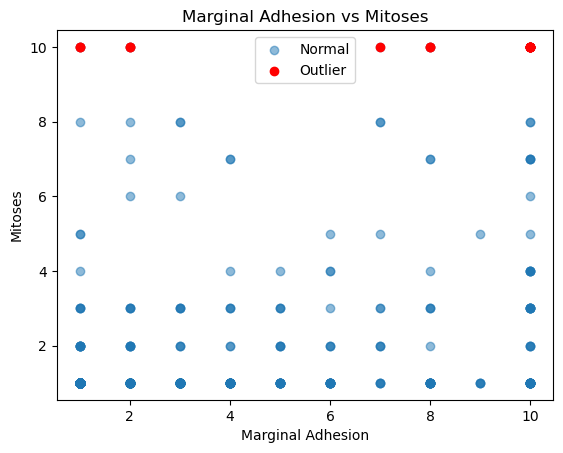

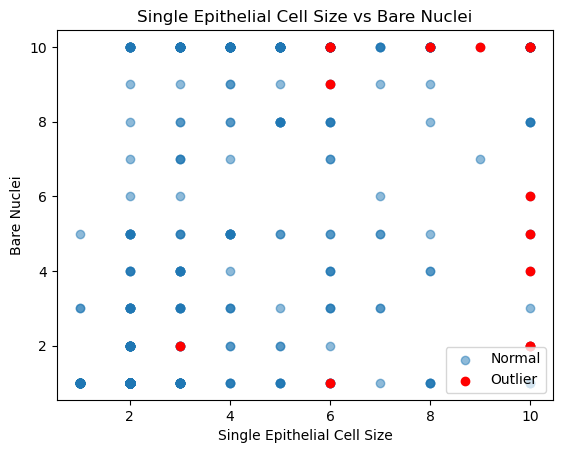

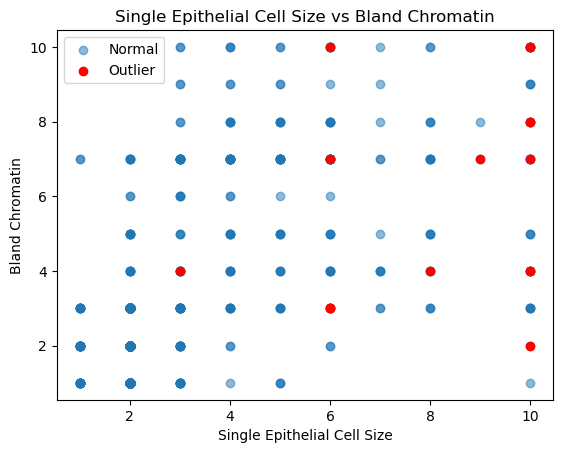

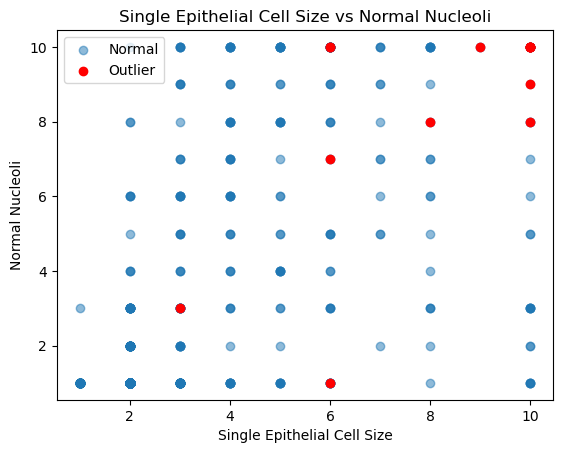

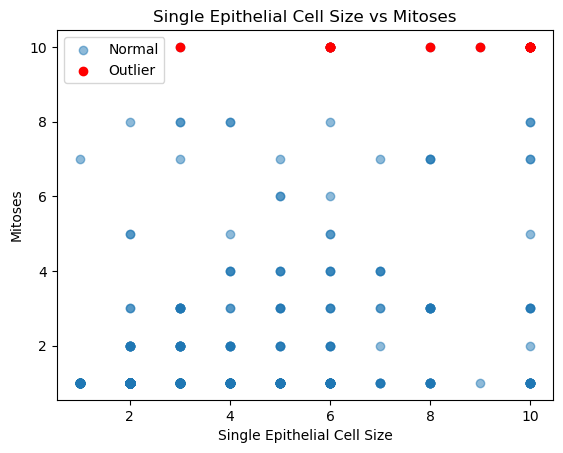

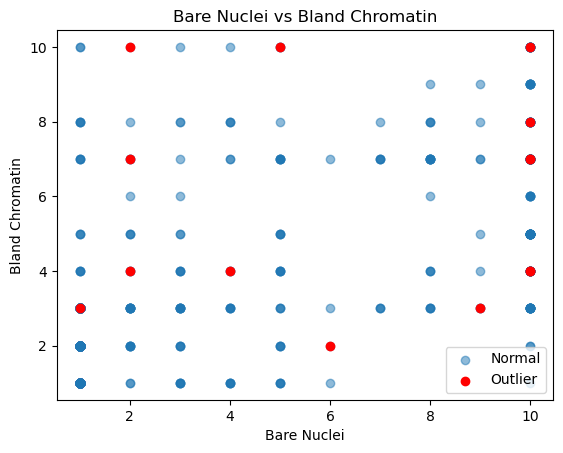

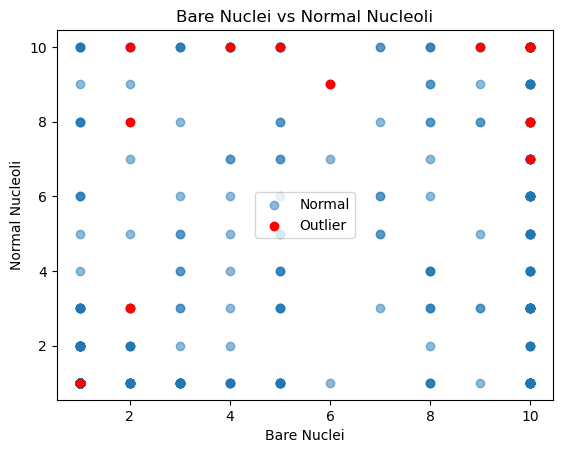

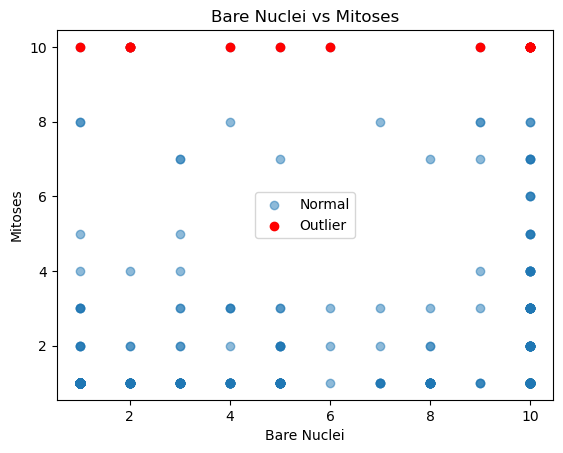

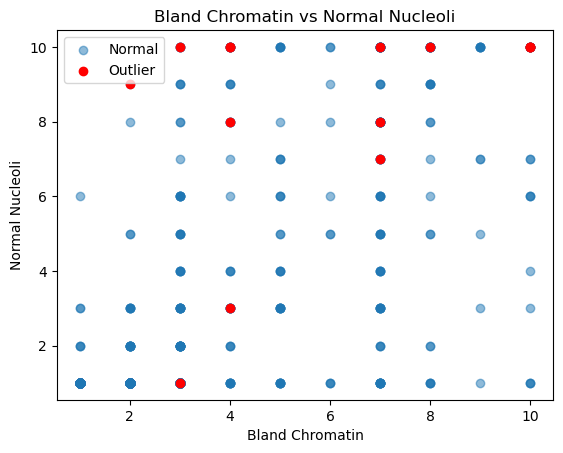

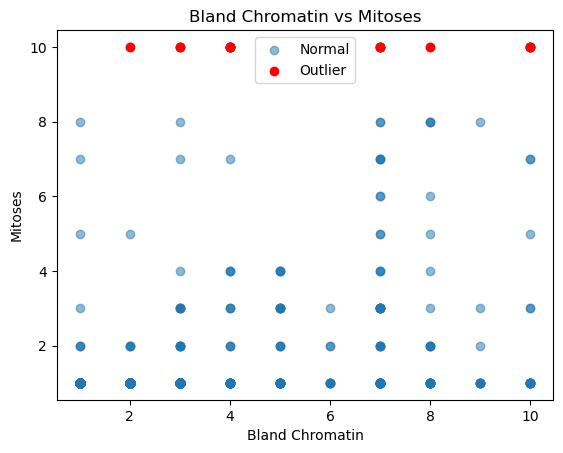

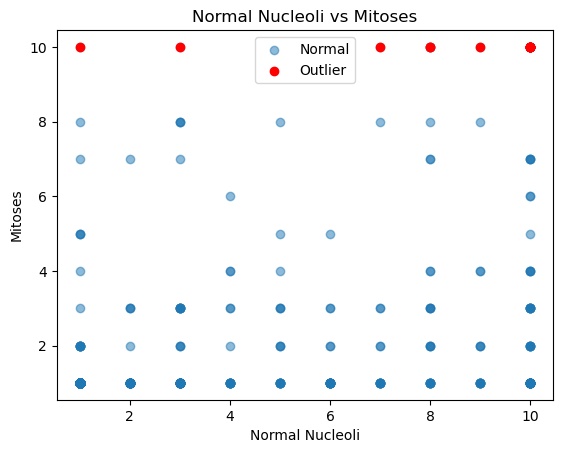

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

# Convert '?' to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Select numeric columns for outlier detection
numeric_columns = data.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['Sample code', 'Class'])

print(numeric_columns)
# Calculate Z-scores for numeric columns
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

# Define threshold for outlier detection
threshold = 4

# Identify outliers using Z-score
outliers = (z_scores > threshold).any(axis=1)
print( len([item for item in outliers if item == True]))

# Plotting all columns against each other
plt.figure(figsize=(15, 15))
for (col1, col2) in itertools.combinations(numeric_columns, 2):
    plt.scatter(data[col1], data[col2], label='Normal', alpha=0.5)
    plt.scatter(data.loc[outliers, col1], data.loc[outliers, col2], c='red', label='Outlier')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')
    plt.legend()
    plt.show()

14


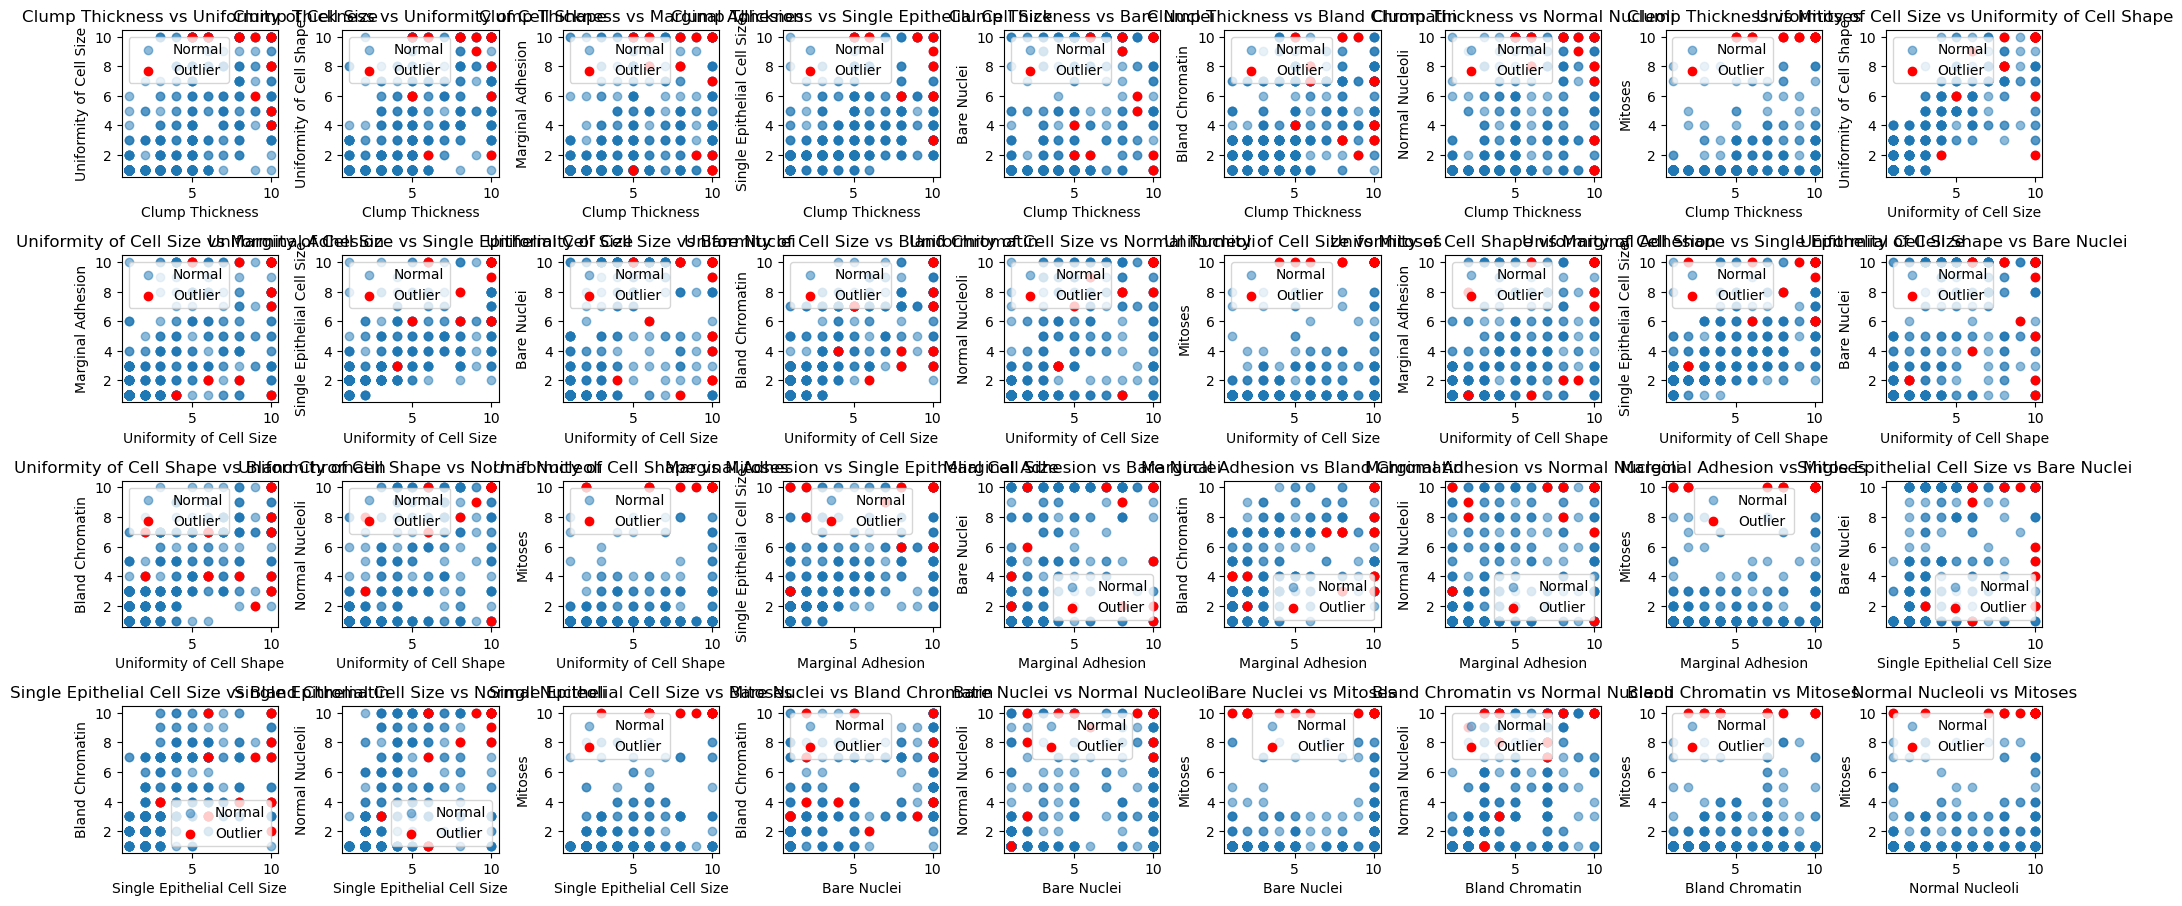

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

# Convert '?' to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Select numeric columns for outlier detection
numeric_columns = data.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['Sample code', 'Class'])

# Calculate Z-scores for numeric columns
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

# Define threshold for outlier detection
threshold = 4

# Identify outliers using Z-score
outliers = (z_scores > threshold).any(axis=1)
print(len(outliers[outliers == True]))

# Plotting all columns against each other
plt.figure(figsize=(20, 20))
num_plots = len(numeric_columns)
plot_number = 1

for (col1, col2) in itertools.combinations(numeric_columns, 2):
    plt.subplot(num_plots, num_plots, plot_number)
    plot_number += 1
    plt.scatter(data[col1], data[col2], label='Normal', alpha=0.5)
    plt.scatter(data.loc[outliers, col1], data.loc[outliers, col2], c='red', label='Outlier')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')
    plt.legend()

plt.tight_layout()
plt.show()


In [4]:
data = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]


In [5]:
import numpy as np

data = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate z-scores for each data point
z_scores = [(x - mean) / std_dev for x in data]

# Set threshold for outlier detection (e.g., 2 or 3)
threshold = 2

# Identify outliers based on threshold
outliers = [data[i] for i in range(len(data)) if abs(z_scores[i]) > threshold]

print("Outlier values:", outliers)


Outlier values: [3.25]


In [6]:
import numpy as np
from scipy.stats import norm

data = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])

# Estimate parameters of the assumed normal distribution
mu, std = norm.fit(data)

# Calculate likelihoods for each data point
likelihoods = norm.pdf(data, loc=mu, scale=std)

# Set a threshold for identifying outliers based on likelihoods
threshold = 0.02  # 

# Identify outliers based on low likelihoods
outliers = data[likelihoods < threshold]

print("Outlier values:", outliers)


Outlier values: [3.25]


In [7]:
import numpy as np
from scipy.stats import norm

data = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])

# Estimate parameters of the assumed normal distribution
mu, std = norm.fit(data)

# Calculate probability density function (PDF) for each data point
pdf_values = norm.pdf(data, loc=mu, scale=std)

# Sort the PDF values
sorted_pdf = np.sort(pdf_values)

# Define a threshold for identifying outliers (e.g., 10% quantile)
threshold_index = int(0.10 * len(data))
threshold = sorted_pdf[threshold_index]

# Identify outliers based on low PDF values
outliers = data[pdf_values < threshold]

print("Outlier values:", outliers)


Outlier values: [3.25]


In [8]:
import numpy as np
from scipy.stats import iqr
 
# Given data
data = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])
 
# Calculate the interquartile range (IQR)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr_value = iqr(data)
 
# Define upper and lower bounds for outlier detection
lower_bound = q1 - 1.5 * iqr_value
upper_bound = q3 + 1.5 * iqr_value
 
# Identify outliers based on the IQR range
outliers = data[(data < lower_bound) | (data > upper_bound)]
 
print("Outlier values:", outliers)

Outlier values: [3.25]


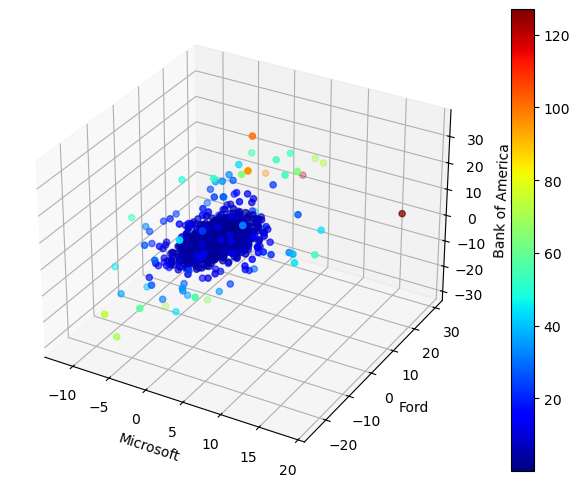

In [9]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection

# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)


N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)


def mahalanobis(x=None, data=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    """
    x_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.matmul(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()


# Compute Mahalanobis distance for delta dataset
mahal = mahalanobis(x=delta, data=delta[['MSFT', 'F', 'BAC']])

# Assign an outlier score for the data based on the computed Mahalanobis distance
outlier_score = mahal

# Display 3D scatterplot with datapoints having a different color according to their outlier score
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=outlier_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

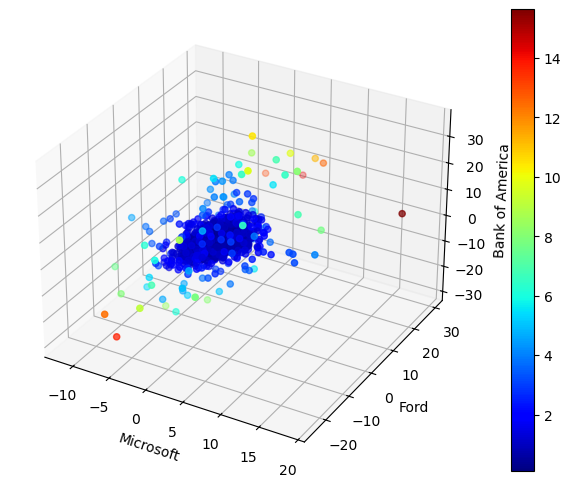

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=4 neighbours
knn = 4
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(delta.values)
distances, indices = nbrs.kneighbors(delta.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=outlier_score,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

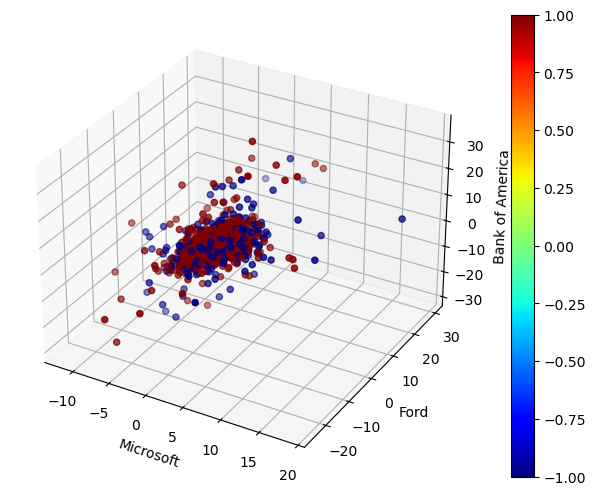

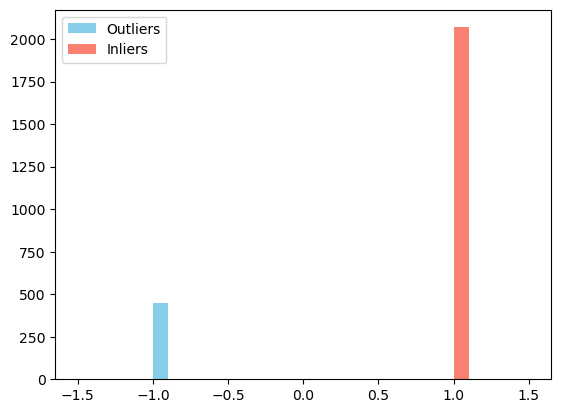

Outliers 0.17798967024235202
Inliers 0.822010329757648


In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
 
# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stock_data = pd.read_csv('stocks.csv', header='infer') 
stock_data.index = stock_data['Date']
stock_data = stock_data.drop(['Date'],axis=1)
stock_data.head()
 
N,d = stock_data.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stock_data.iloc[1:,:].values-stock_data.iloc[:N-1,:].values, stock_data.iloc[:N-1,:].values),
                    columns=stock_data.columns, index=stock_data.iloc[1:].index)
 
ee = OneClassSVM(nu=0.01,gamma='auto')
labels = ee.fit_predict(delta) # Perform fit on input data and returns labels for that input data.
 
# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
axis = fig.add_subplot(111, projection='3d')
p = axis.scatter(delta.MSFT,delta.F,delta.BAC,c= labels,cmap='jet')
axis.set_xlabel('Microsoft')
axis.set_ylabel('Ford')
axis.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()
 
plt.hist(labels[labels==-1],label ='Outliers',color='skyblue')
plt.hist(labels[labels==1],label = 'Inliers',color='salmon')
plt.legend()
plt.show()
 
frequency_outliers = len(labels[labels==-1])/len(labels)
frequency_inliers = len(labels[labels==1])/len(labels)
print('Outliers',frequency_outliers)
print('Inliers',frequency_inliers)

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

# HTML content provided
html_content = '''
<!DOCTYPE html>
<html>
<body>

<h1>ECS766P Data Mining - Week 10</h1>
<p>The below table contains income data per country; the same table was used for the Week 3 lab.</p>

<table class="table table-bordered table-hover table-condensed">
<thead><tr><th title="Field #1">Region</th>
<th title="Field #2">Age</th>
<th title="Field #3">Income</th>
<th title="Field #4">Online Shopper</th>
</tr></thead>
<tbody><tr>
<td>India</td>
<td align="right">49</td>
<td align="right">86400</td>
<td>No</td>
</tr>
<!-- ... other table rows ... -->
</tbody></table>

</body>
</html>
'''

# Parse HTML content with Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table within the parsed HTML
table = soup.find('table')

# Extract table headers and rows
headers = [header.text.strip() for header in table.find_all('th')]
rows = []
for row in table.find_all('tr')[1:]:
    rows.append([val.text.strip() for val in row.find_all('td')])

# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
print(df)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
 
# Load the stock prices dataset
stocks_url = 'stocks.csv'  # Replace with the actual link to your stocks.csv file
stocks_df = pd.read_csv(stocks_url, index_col='Date', parse_dates=True)
 
# Print the column names to identify the correct column
print(stocks_df.columns)
 
# Assuming the correct column names for daily closing prices are 'MSFT', 'F', and 'BAC'
# Replace 'MSFT', 'F', and 'BAC' with the correct column names if needed
columns_names = ['MSFT', 'F', 'BAC']
X = stocks_df[columns_names].pct_change().dropna().values
 
# Fit One-Class SVM model
ee = OneClassSVM(nu=0.01, gamma='auto')
yhat = ee.fit_predict(X)
 
# Plotting a 3D scatterplot of the dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
 
# Scatterplot with color-coded outliers and inliers
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yhat, cmap='viridis', s=50)
 
# Set labels
ax.set_xlabel('Percentage Change in MSFT Daily Closing Price')
ax.set_ylabel('Percentage Change in F Daily Closing Price')
ax.set_zlabel('Percentage Change in BAC Daily Closing Price')

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.impute import SimpleImputer
 
# URL of the HTML page
url = 'http://eecs.qmul.ac.uk/~emmanouilb/income_table.html'
 
# Send a GET request to the URL
response = requests.get(url)
 
# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')
 
# Find the table element based on its class
table = soup.find('table', class_='table table-bordered table-hover table-condensed')
 
# Extract column headers from the table
headers = [th.get_text(strip=True) for th in table.find('thead').find_all('th')]
 
# Extract data from the table rows
data = []
for row in table.find('tbody').find_all('tr'):
    row_data = [td.get_text(strip=True) for td in row.find_all(['td', 'th'])]
    data.append(row_data)
 
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=headers)
 
df[df==''] = np.nan
df['Age'] = df['Age'].astype(float)
 
# Display the DataFrame
print(df)

   Region   Age Income Online Shopper
0   India  49.0  86400             No
1  Brazil  32.0  57600            Yes
2     USA  35.0  64800             No
3  Brazil  43.0  73200             No
4     USA  45.0    NaN            Yes
5   India  40.0  69600            Yes
6  Brazil   NaN  62400             No
7   India  53.0  94800            Yes
8     USA  55.0  99600             No
9   India  42.0  80400            Yes


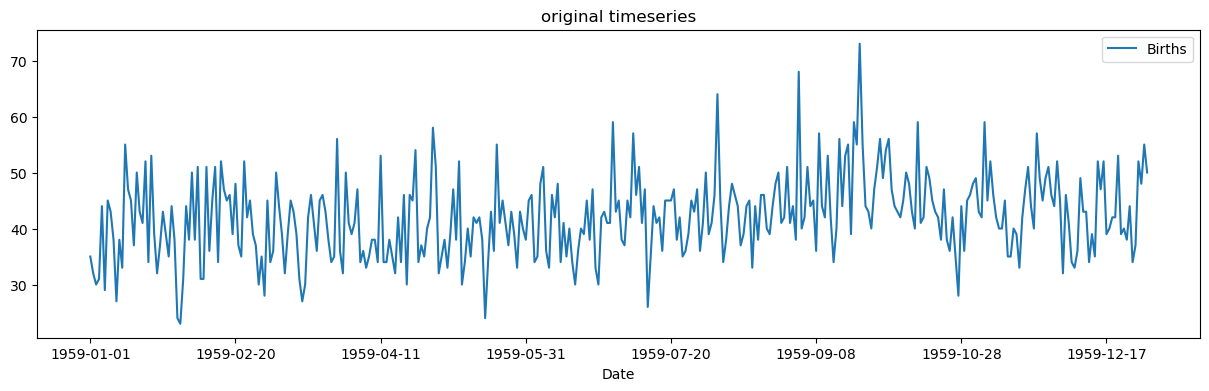

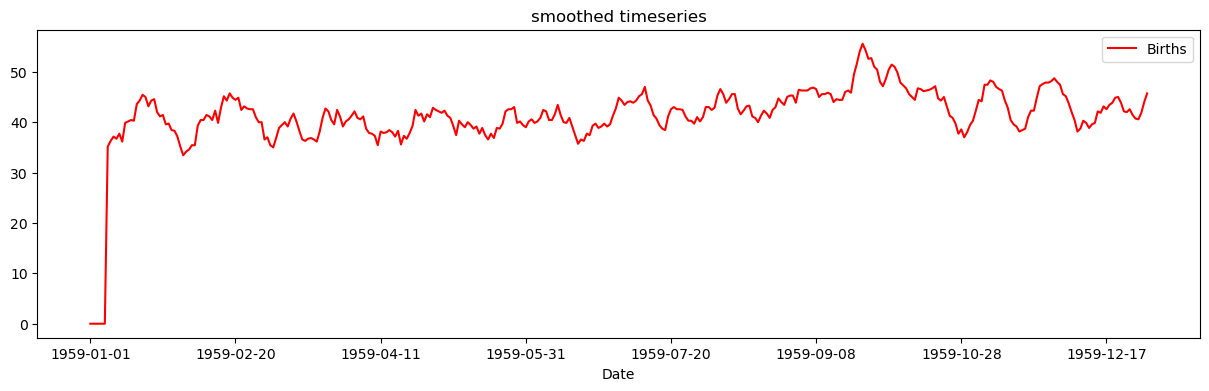

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/st

Prediction made by AR model for first five days of 1960 are as follows:
1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64

Prediction made by ARMA model for first five days of 1960 are as follows:
1960-01-01    45.810248
1960-01-02    45.818768
1960-01-03    45.728095
1960-01-04    45.564019
1960-01-05    45.347309
Freq: D, Name: predicted_mean, dtype: float64


In [18]:
from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from random import random
from statsmodels.tsa.ar_model import AutoReg
 
series = read_csv('births.csv', header=0, index_col=0)
# series.plot(figsize=(15,4))
 
# Perform trailing moving average smoothing
rolling = series.rolling(window=7)
rolling_mean = rolling.mean()
 
#Replace the nan values with zero
rolling_mean.fillna(0,inplace=True)
 
# plot original and transformed dataset
series.plot(figsize=(15,4),title='original timeseries')
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries')
plt.show()
 
# Fit Autoregressive model
model = AutoReg(rolling_mean, lags=2,old_names=False) 
model_fit = model.fit()
 
# Make prediction
AR_Predictions = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # arguments denote which dataset indices to predict
print('Prediction made by AR model for first five days of 1960 are as follows:')
print(AR_Predictions)
 
# Fit ARMA model
model = ARIMA(rolling_mean, order=(2, 0, 2)) # p=2, q=1
model_fit = model.fit()
 
# Make prediction
ARMA_Predictions = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # arguments denote which dataset indices to predict
print('\nPrediction made by ARMA model for first five days of 1960 are as follows:')
print(ARMA_Predictions)